In [ ]:
#Linear regression 

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
housing

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,30,RL,NaN,8854,Pave,NaN,Reg,...,40,0,NaN,NaN,NaN,0,5,2009,WD,Normal
760,905402060,1733,139600,20,RL,NaN,13680,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
761,909275030,2002,145000,90,RH,82.0,6270,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
762,907192040,1842,217500,60,RL,NaN,8826,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal


In [7]:
# GrLivArea  vs Sale Price (2)
# Cross validation 
from sklearn.model_selection import KFold 
# Select features and target
X = housing[['GrLivArea']].values  # Convert to numpy array for KFold
y = housing['SalePrice'].values    # Convert to numpy array for KFold

# Initialize Linear Regression and K-Fold
model = LinearRegression()
kf = KFold(n_splits=5)

# Manually perform K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(kf.split(X), start=1):
    # Split the data into training and testing sets
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model and predict
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Calculate and print the R^2 score for the current fold
    print(f"Fold {fold}:")
    print(f"TRAIN set size: {len(train_index)}")
    print(f"TEST set size: {len(test_index)}")
    print(f"R^2 score: {round(r2_score(y_test, y_pred), 4)}\n")

Fold 1:
TRAIN set size: 2064
TEST set size: 516
R^2 score: 0.4884

Fold 2:
TRAIN set size: 2064
TEST set size: 516
R^2 score: 0.5412

Fold 3:
TRAIN set size: 2064
TEST set size: 516
R^2 score: 0.5214

Fold 4:
TRAIN set size: 2064
TEST set size: 516
R^2 score: 0.5458

Fold 5:
TRAIN set size: 2064
TEST set size: 516
R^2 score: 0.4672



In [8]:
from sklearn.model_selection import cross_val_score

cross_val_score(model,X,y,cv=5)

array([0.48839145, 0.54118421, 0.52138468, 0.54578829, 0.46720803])

In [9]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('regressor', model)
])

In [10]:
pipeline

Pipeline(steps=[('regressor', LinearRegression())])

In [11]:
cross_val_score(pipeline,X,y).mean()

0.5127913332712819

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)

# Remove columns with missing values
housing = housing.dropna(axis=1)

# Define the target variable
y = housing['SalePrice']

# Initialize a dictionary to store the mean cross-validation score for each column
mean_scores = {}

# Preprocessing pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the model
model = LinearRegression()

# Perform cross-validation for each column
for column in housing.drop('SalePrice', axis=1).columns:
    X_single_column = housing[[column]]  # Select the single column

    if X_single_column.dtypes.iloc[0] in ['int64', 'float64']:
        # Numeric column
        pipeline = Pipeline(steps=[
            ('preprocessor', numeric_transformer),
            ('regressor', model)
        ])
    else:
        # Categorical column
        pipeline = Pipeline(steps=[
            ('preprocessor', categorical_transformer),
            ('regressor', model)
        ])

    scores = cross_val_score(pipeline, X_single_column, y, cv=5)
    mean_scores[column] = scores.mean()

# Print the mean cross-validation score for each column
for column, mean_score in mean_scores.items():
    print(f"Mean cross-validation score for {column}: {mean_score}")




Mean cross-validation score for PID: 0.037296677953075695
Mean cross-validation score for GrLivArea: 0.5127913332712819
Mean cross-validation score for MSSubClass: -0.003295383365451965
Mean cross-validation score for MSZoning: 0.1028050726310638
Mean cross-validation score for LotArea: 0.055424358701118524
Mean cross-validation score for Street: -0.007913501254882415
Mean cross-validation score for LotShape: 0.0882684425779698
Mean cross-validation score for LandContour: 0.017609160286188464
Mean cross-validation score for Utilities: -5.212371418201686e+29
Mean cross-validation score for LotConfig: 0.00897559471150835
Mean cross-validation score for LandSlope: -0.0076784448580390794
Mean cross-validation score for Neighborhood: 0.5406642239019958
Mean cross-validation score for Condition1: 0.032215626001454445
Mean cross-validation score for Condition2: 0.01136001892705001
Mean cross-validation score for BldgType: 0.024115170429652544
Mean cross-validation score for HouseStyle: 0.0552

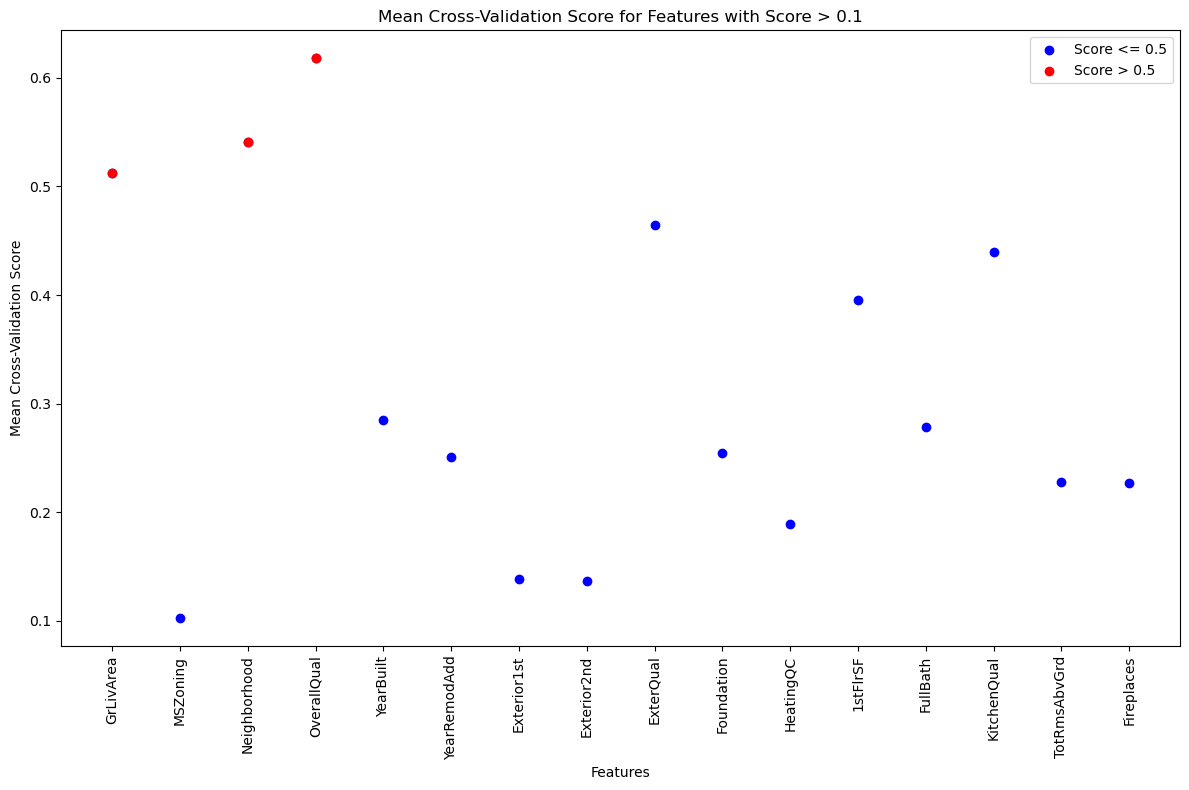

In [22]:
# Filter columns with mean cross-validation score greater than 0.1
filtered_scores = {column: score for column, score in mean_scores.items() if score > 0.1}

# Visualize the mean cross-validation score for each filtered column using a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(filtered_scores.keys(), filtered_scores.values(), color='b')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Mean Cross-Validation Score')
plt.title('Mean Cross-Validation Score for Features with Score > 0.1')

# Highlight features with score > 0.5
high_scores = {column: score for column, score in filtered_scores.items() if score > 0.5}
plt.scatter(high_scores.keys(), high_scores.values(), color='r')

# Add legend
plt.legend(['Score <= 0.5', 'Score > 0.5'], loc='upper right')

plt.tight_layout()
plt.show()

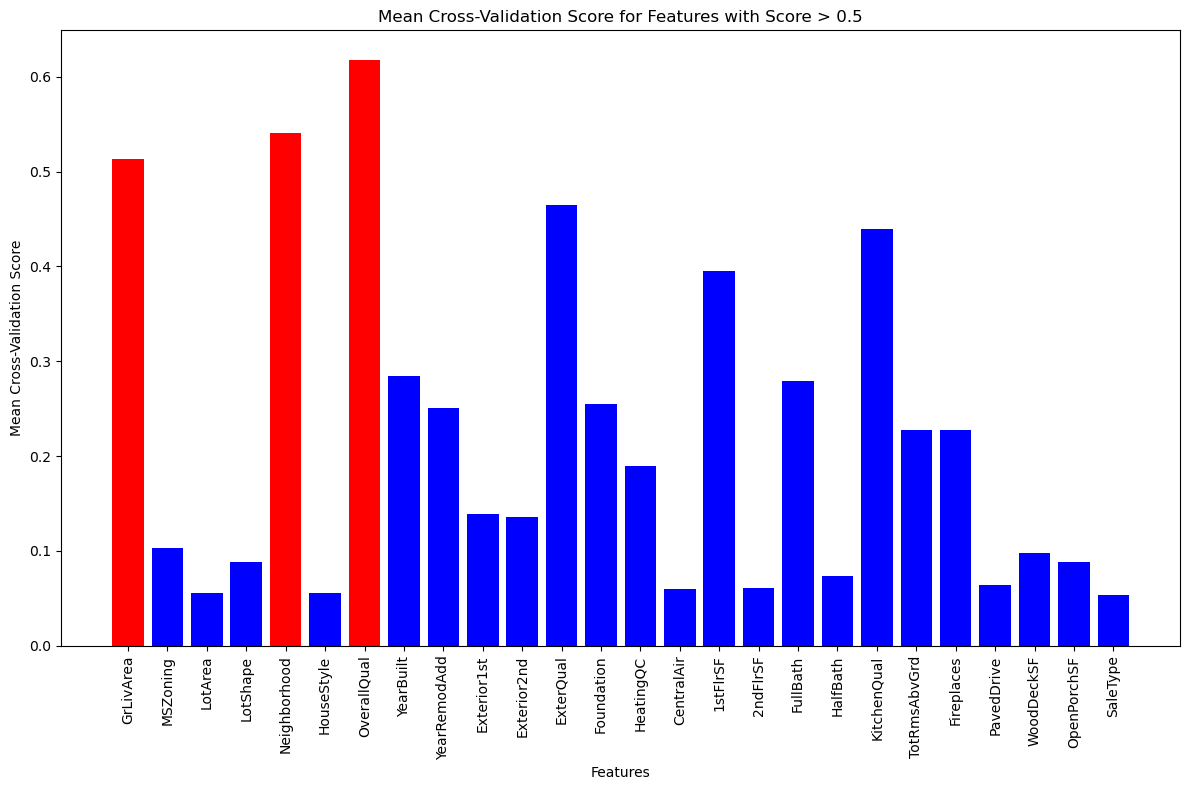

In [26]:
# Filter columns with mean cross-validation score greater than 0.1
filtered_scores = {column: score for column, score in mean_scores.items() if score > 0.05}

# Prepare data for visualization
features = list(filtered_scores.keys())
scores = list(filtered_scores.values())
colors = ['r' if score > 0.5 else 'b' for score in scores]

# Visualize the mean cross-validation score for each filtered column using a bar plot
plt.figure(figsize=(12, 8))
plt.bar(features, scores, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Mean Cross-Validation Score')
plt.title('Mean Cross-Validation Score for Features with Score > 0.5')
plt.tight_layout()
plt.show()

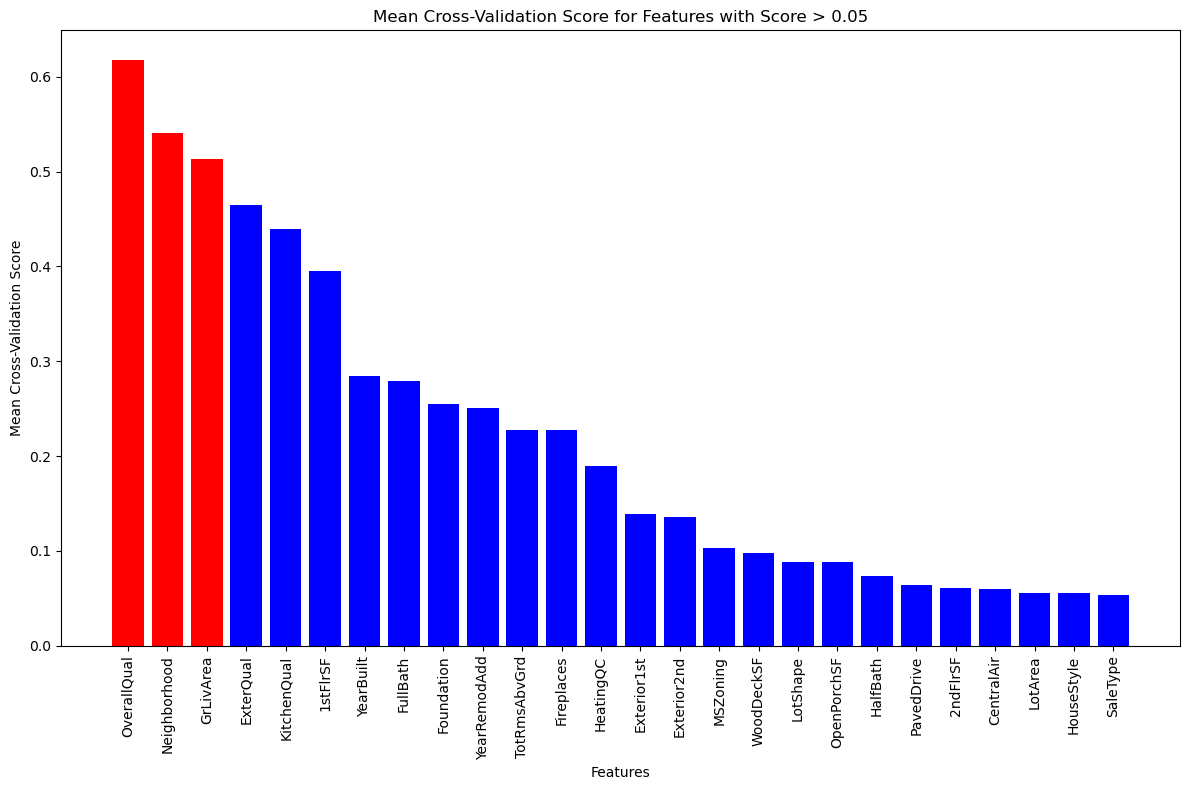

In [27]:
# Filter columns with mean cross-validation score greater than 0.05
filtered_scores = {column: score for column, score in mean_scores.items() if score > 0.05}

# Sort the filtered scores based on the scores
sorted_scores = dict(sorted(filtered_scores.items(), key=lambda item: item[1], reverse=True))

# Prepare data for visualization
features = list(sorted_scores.keys())
scores = list(sorted_scores.values())
colors = ['r' if score > 0.5 else 'b' for score in scores]

# Visualize the mean cross-validation score for each filtered column using a bar plot
plt.figure(figsize=(12, 8))
plt.bar(features, scores, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Mean Cross-Validation Score')
plt.title('Mean Cross-Validation Score for Features with Score > 0.05')
plt.tight_layout()
plt.show()

In [35]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Define the target variable
y = housing['SalePrice']
X = housing[['GrLivArea']].copy()

# Preprocessing pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define the model
model = LinearRegression()

# Create k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Prepare the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', numeric_transformer),
    ('regressor', model)
])

# Store predictions and actual values for plotting
all_predictions = []
all_actuals = []




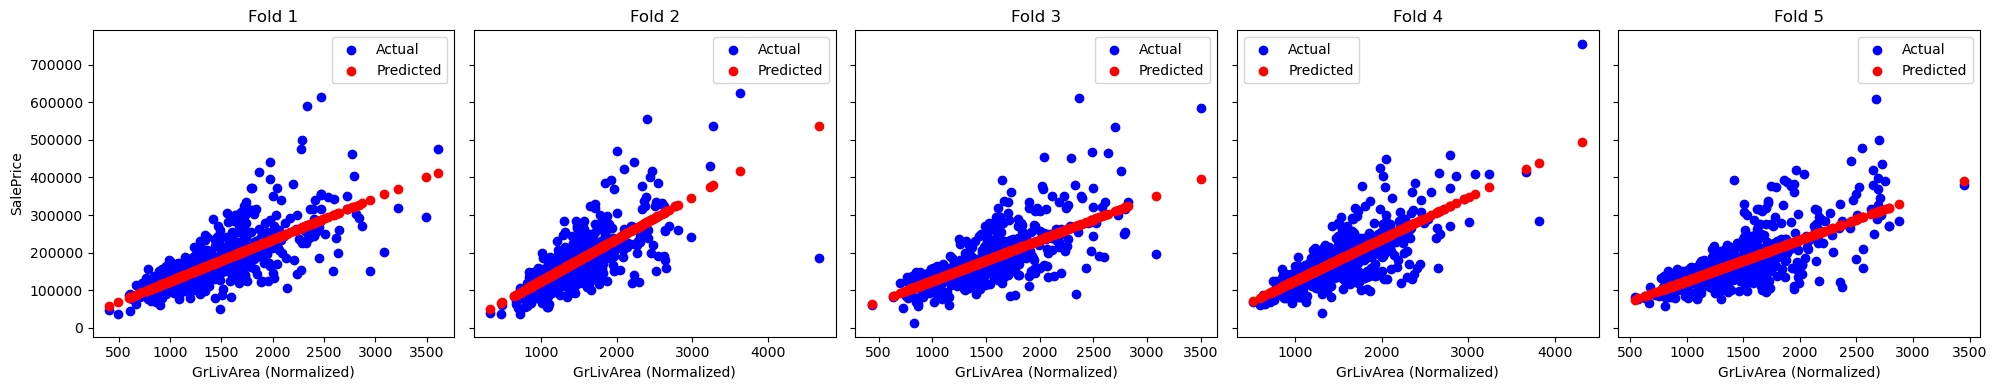

In [36]:
# Set up the figure for multiple subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

# Perform cross-validation and plot on subplots
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    
    axes[i].scatter(X_test, y_test, color='blue', label='Actual')
    axes[i].scatter(X_test, predictions, color='red', label='Predicted')
    axes[i].set_xlabel('GrLivArea (Normalized)')
    if i == 0:
        axes[i].set_ylabel('SalePrice')
    axes[i].set_title(f'Fold {i+1}')
    axes[i].legend()

plt.tight_layout()
plt.show()


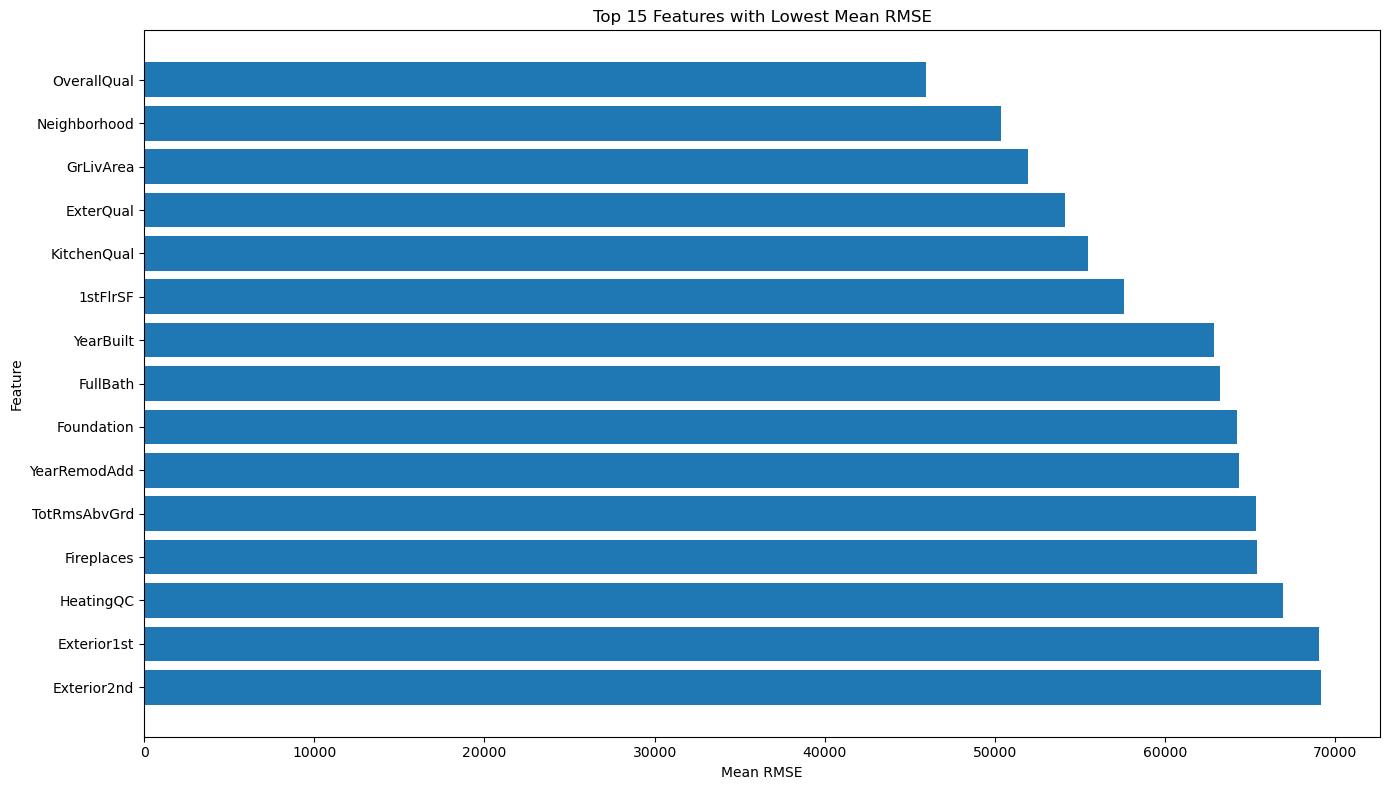

In [3]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import cross_val_score

# Load the dataset
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)

# Remove columns with missing values
housing = housing.dropna(axis=1)

# Define the target variable
y = housing['SalePrice']

# Initialize a dictionary to store the mean RMSE for each column
mean_scores = {}

# Preprocessing pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the model
model = LinearRegression()

# Perform cross-validation for each column
for column in housing.drop('SalePrice', axis=1).columns:
    X_single_column = housing[[column]]  # Select the single column

    if X_single_column.dtypes.iloc[0] in ['int64', 'float64']:
        # Numeric column
        pipeline = Pipeline(steps=[
            ('preprocessor', numeric_transformer),
            ('regressor', model)
        ])
    else:
        # Categorical column
        pipeline = Pipeline(steps=[
            ('preprocessor', categorical_transformer),
            ('regressor', model)
        ])

    scores = cross_val_score(pipeline, X_single_column, y, cv=5, scoring='neg_root_mean_squared_error')
    mean_scores[column] = -scores.mean()  # Convert negative RMSE to positive

# Sort the features by their mean RMSE
sorted_scores = sorted(mean_scores.items(), key=lambda item: item[1])

# Select the top 15 features with the lowest RMSE
top_15_features = sorted_scores[:15]
top_15_columns, top_15_rmse = zip(*top_15_features)

# Plot the mean RMSE for the top 15 features
plt.figure(figsize=(14, 8))
plt.barh(top_15_columns, top_15_rmse)
plt.xlabel('Mean RMSE')
plt.ylabel('Feature')
plt.title('Top 15 Features with Lowest Mean RMSE')
plt.gca().invert_yaxis()  # Invert y-axis to show the lowest RMSE at the top
plt.tight_layout()
plt.show()
